## Title Page:

**College of Professional Studies, Northeastern University**  
**ALY6020**  
**Professor Ajit Appari**  
**October 8th, 2024**

## Introduction:

**In this analysis, we examine a dataset to comprehend subscription patterns and pinpoint elements that are causing a magazine company's subscriptions to drop. The project is broken up into four sections, each of which focuses on a distinct facet of model construction and assessment.**

**We preprocessed the data and used the required data cleansing procedures to make sure the dataset was ready for analysis. In order to forecast subscription behaviors, Part 2 involved developing a Logistic Regression model. This gave rise to a baseline for comprehending how various characteristics affect the probability of renewing a membership.**

**We were able to evaluate the Quadratic Discriminant Analysis (QDA) model's performance in comparison to the Logistic Regression model. We examined key variables and their business ramifications, evaluating both models on accuracy, precision, and recall.**


## PART 1:

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/Users/sahildeshmukh/Downloads/marketing_campaign.xlsx'
df = pd.read_excel(file_path)

# Inspect the dataset
print(df.head())       
  


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
print(df.describe()) 

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [20]:
# Checking for missing values:

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)




Missing values per column:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [22]:
# There are 24 missing values in 'Income' so we impute it with the median and assign back to the column.
df['Income'] = df['Income'].fillna(df['Income'].median())


In [24]:
# Checking for duplicates:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [28]:
# Converting 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Converting categorical columns to 'category' type
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')


In [32]:
# Detecting the outliers in Income
from scipy import stats
z_scores = np.abs(stats.zscore(df['Income']))
outliers = (z_scores > 3)
print(f"Number of outliers in 'Income': {outliers.sum()}")

income_cap = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > income_cap, income_cap, df['Income'])


Number of outliers in 'Income': 8


In [36]:
# Standardizing the casing in categorical columns
df['Education'] = df['Education'].str.capitalize()
df['Marital_Status'] = df['Marital_Status'].str.capitalize()

# Checking for unique values
print("Unique values in 'Education':", df['Education'].unique())
print("Unique values in 'Marital_Status':", df['Marital_Status'].unique())


Unique values in 'Education': ['Graduation' 'Phd' 'Master' 'Basic' '2n cycle']
Unique values in 'Marital_Status': ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'Yolo']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Other']


In [40]:
# Replacing invalid 'Marital_Status' values with 'Other'
df['Marital_Status'] = df['Marital_Status'].replace(['Absurd', 'Yolo'], 'Other')
print(df['Marital_Status'].unique())


['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Other']


In [42]:
# Saving the cleaned dataset to a new CSV file
df.to_csv('/Users/sahildeshmukh/Downloads/cleaned_marketing_campaign.csv', index=False)


## Visualizations:


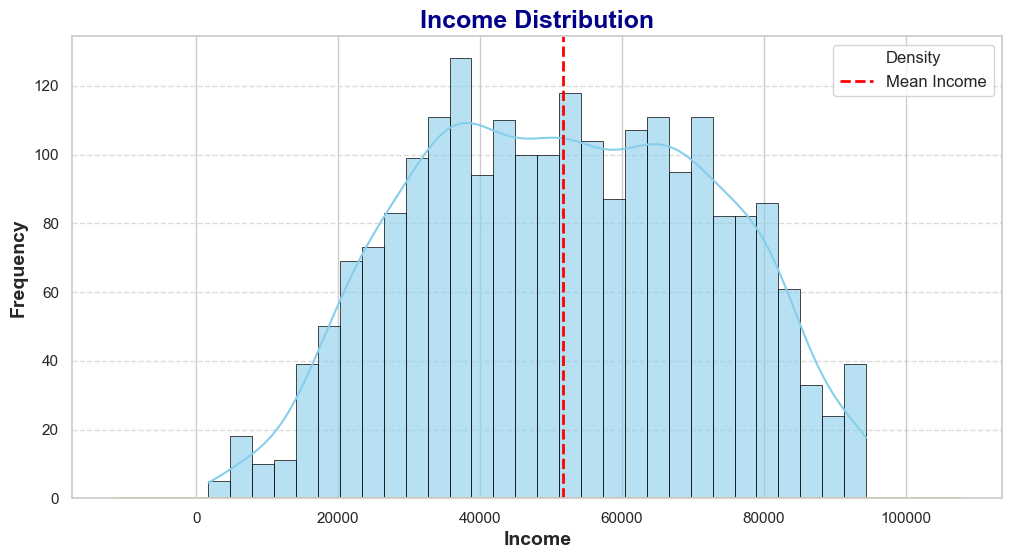

In [66]:
# Income Distribution Histogram:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.6, linewidth=0.5)
sns.kdeplot(df['Income'], color='orange', linewidth=2)
plt.title('Income Distribution', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Income', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_income = df['Income'].mean()
plt.axvline(mean_income, color='red', linestyle='--', linewidth=2, label='Mean Income')
plt.legend(title='Density', fontsize=12)
plt.show()

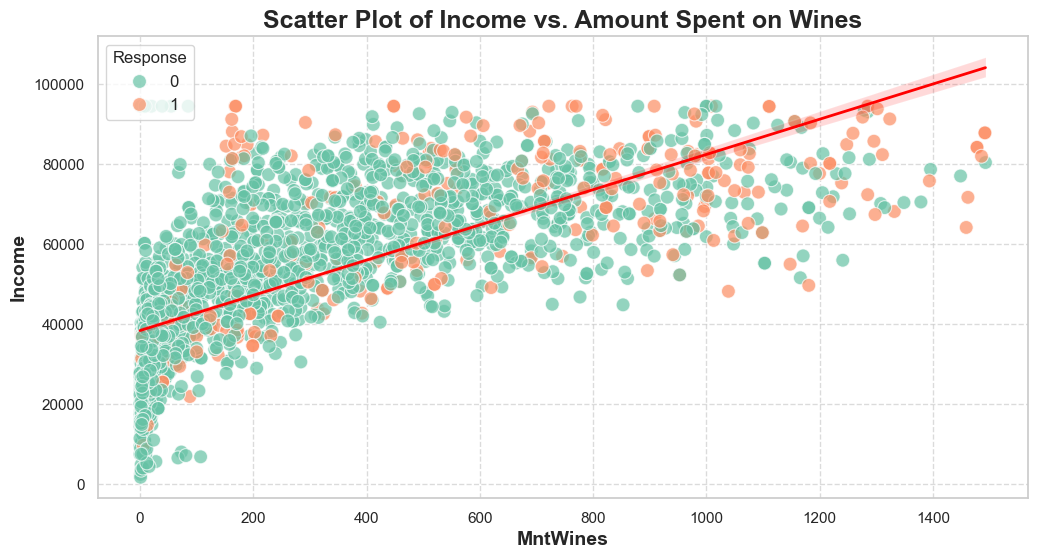

In [72]:
# Scatter plot of Income vs Amount Spent on wines:

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MntWines', y='Income', hue='Response', palette='Set2', alpha=0.7, s=100)
plt.title('Scatter Plot of Income vs. Amount Spent on Wines', fontsize=18, fontweight='bold')
plt.xlabel('Amount Spent on Wines', fontsize=14, fontweight='bold')
plt.ylabel('Income', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

sns.regplot(data=df, x='MntWines', y='Income', scatter=False, color='red', line_kws={'linewidth': 2})

plt.legend(title='Response', loc='upper left', fontsize=12)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


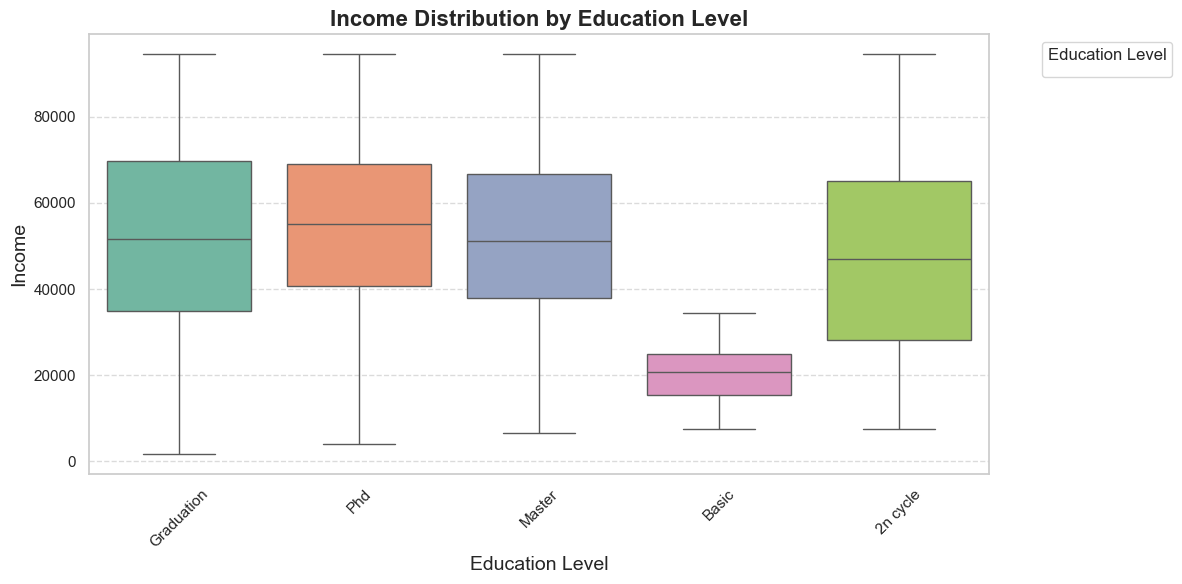

In [80]:
# Box plot for Income distribution by Education level:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Income', data=df, hue='Education', palette='Set2')
plt.title('Income Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## PART 2:

In [89]:
print(df['Response'].value_counts())


Response
0    1906
1     334
Name: count, dtype: int64


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df.drop(columns=['ID', 'Dt_Customer', 'Response'])
y = df['Response']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize logistic regression model with class weights
model = LogisticRegression(class_weight='balanced', solver='liblinear')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[315  66]
 [ 14  53]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       381
           1       0.45      0.79      0.57        67

    accuracy                           0.82       448
   macro avg       0.70      0.81      0.73       448
weighted avg       0.88      0.82      0.84       448



Accuracy: 0.82


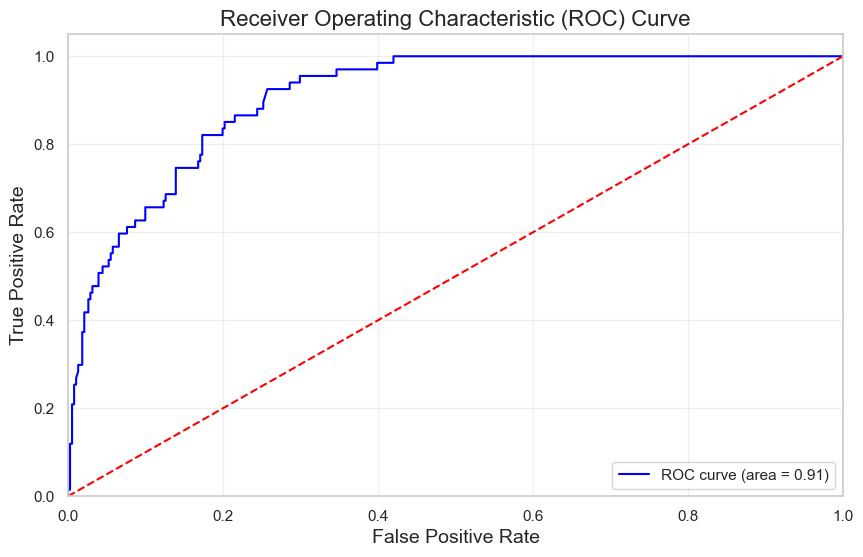

In [97]:
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


## PART 3:

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


In [172]:
# Defining features and target:
X = df.drop(columns=['ID', 'Dt_Customer', 'Response'])
y = df['Response']

X_encoded = pd.get_dummies(X, drop_first=True)

# Spliting the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [174]:
# Quadratic Discriminant Analysis model:
qda_model = QuadraticDiscriminantAnalysis()

qda_model.fit(X_train, y_train)
y_pred = qda_model.predict(X_test)

# Evaluating the model:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[331  50]
 [ 30  37]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       381
           1       0.43      0.55      0.48        67

    accuracy                           0.82       448
   macro avg       0.67      0.71      0.69       448
weighted avg       0.84      0.82      0.83       448



/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.82


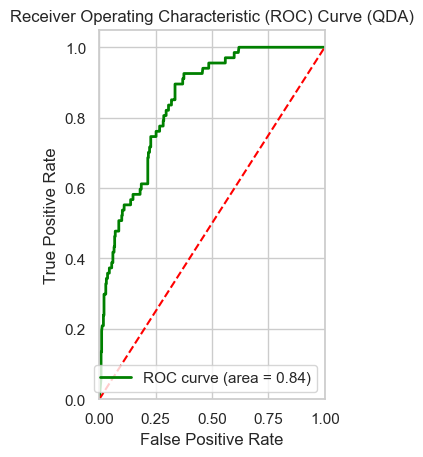

In [176]:
accuracy_qda = qda_model.score(X_test, y_test)
print(f'Accuracy: {accuracy_qda:.2f}')

# Predicting probabilities for the positive class
y_prob_qda = qda_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr_qda, tpr_qda, color='green', lw=2, label=f'ROC curve (area = {roc_auc_qda:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (QDA)')
plt.legend(loc='lower right')
plt.show()



## PART 4:

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

confusion_qda = confusion_matrix(y_test, y_pred_qda)
report_qda = classification_report(y_test, y_pred_qda, output_dict=True)


print("\nQuadratic Discriminant Analysis Confusion Matrix:")
print(confusion_qda)
print("Quadratic Discriminant Analysis Classification Report:")
print(report_qda)

# Models Comparison
metrics = {
    'Logistic Regression': {
        'Accuracy': report_logistic['accuracy'],
        'Precision': report_logistic['1']['precision'],
        'Recall': report_logistic['1']['recall']
    },
    'Quadratic Discriminant Analysis': {
        'Accuracy': report_qda['accuracy'],
        'Precision': report_qda['1']['precision'],
        'Recall': report_qda['1']['recall']
    }
}

# Metrics for comparison
print("\nModel Comparison:")
for model, values in metrics.items():
    print(f"{model}:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.2f}")



Quadratic Discriminant Analysis Confusion Matrix:
[[331  50]
 [ 30  37]]
Quadratic Discriminant Analysis Classification Report:
{'0': {'precision': 0.9168975069252078, 'recall': 0.868766404199475, 'f1-score': 0.8921832884097035, 'support': 381.0}, '1': {'precision': 0.42528735632183906, 'recall': 0.5522388059701493, 'f1-score': 0.4805194805194805, 'support': 67.0}, 'accuracy': 0.8214285714285714, 'macro avg': {'precision': 0.6710924316235234, 'recall': 0.7105026050848122, 'f1-score': 0.686351384464592, 'support': 448.0}, 'weighted avg': {'precision': 0.8433754531519361, 'recall': 0.8214285714285714, 'f1-score': 0.8306174957118354, 'support': 448.0}}

Model Comparison:
Logistic Regression:
  Accuracy: 0.82
  Precision: 0.45
  Recall: 0.79
Quadratic Discriminant Analysis:
  Accuracy: 0.82
  Precision: 0.43
  Recall: 0.55


**Accuracy: Both models achieved the same accuracy of 0.82, indicating that they classify approximately 82% of the instances correctly. However, accuracy alone does not provide a full picture, especially when dealing with class imbalance.**

**Precision: The Logistic Regression model slightly outperforms the QDA model in terms of precision for the positive class (Class 1). Logistic Regression has a precision of 0.45 compared to 0.43 for QDA. This means that when the model predicts Class 1, it is correct about 45% of the time with Logistic Regression, compared to 43% with QDA.**

**Recall: Logistic Regression has a significantly higher recall of 0.79 compared to QDA’s 0.55. This indicates that Logistic Regression is better at identifying actual positive cases compared to QDA.**



## Conclusion:

**Logistic Regression is the preferred model for this dataset because it demonstrates better precision and significantly better recall than the Quadratic Discriminant Analysis model. This suggests that it is more effective at identifying positive cases while maintaining a similar accuracy level.**
